In [1]:
import socket
import sys
import binascii
import numpy as np
import matplotlib.pylab as plt
import math
import codecs
import re
from Area import Area
from Punto import Punto

In [2]:
def introduceAreas():
    numero_areas=int(input('número de Areas: '))#.split(',')
    numero_vertuces=numero_areas*4
    areas=list()
    for j in range(1,numero_areas+1):
        print('coordenadas del área '+str(j)+':')
        user_input = Area()
        user_input.setLimites()
        areas.append(user_input)
    return areas

In [3]:
areas_input=introduceAreas()

número de Areas: 2
coordenadas del área 1:
intriduce coordenada X e Y separadas por "," 1:1,2
intriduce coordenada X e Y separadas por "," 2:2,3
intriduce coordenada X e Y separadas por "," 3:3,4
intriduce coordenada X e Y separadas por "," 4:4,5


coordenadas del área 2:
intriduce coordenada X e Y separadas por "," 1:5,6
intriduce coordenada X e Y separadas por "," 2:6,7
intriduce coordenada X e Y separadas por "," 3:7,8
intriduce coordenada X e Y separadas por "," 4:8,9




In [4]:
for e in areas_input:
    for p in e.getLimites():
        print(p.getX(),p.getY())

1 2
2 3
3 4
4 5
5 6
6 7
7 8
8 9


In [ ]:
# Se crea el socket
sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)

# Se conecta y se comprueba que la conexión se realizó con exito
server_address = ('192.168.0.10', 10940)
print (sys.stderr, 'connecting to %s port %s' % server_address)
try:
    sock.connect(server_address)
except socket.timeout:
    print('Error de conexion')
try:
    
    # Envio del mensaje (000EAR02 - Envio continuo de información de escaneo)
    message = [bytes([2]),chr(48),chr(48),chr(48),chr(69),chr(65),chr(82),chr(48),chr(50),binascii.unhexlify(b"00"),binascii.unhexlify(b"83"),bytes([3])]
    b = bytearray()
    b.extend(map(ord, message))
    print (sys.stderr, 'sending "%s"' % b)
    sock.send(b)

    # Se recoge la respuesta (En este caso la información de lectura del láser)
    num_sens=2
    amount_received = 0
    amount_expected = 4500*num_sens
    print (sys.stderr, 'reciving "%s" bytes' % amount_expected)
    sens=""
    while amount_received < amount_expected:
        data = sock.recv(32)
        #A demas de imprimirse para ver su correcto funcionamiento se almacena en forma de cadena
        sens+= data.decode('utf-8')
        amount_received += len(data)
        print (sys.stderr, 'received "%s"' % data)
    print(len(sens))
finally:
    print (sys.stderr, 'closing socket')
    sock.close()

In [5]:
#Cadena con toda la información enviada por el láser
sens='\x020010AR02126B28\x03\x02111BAR0200000000011110000000000000005DA000000000001AA0194019901B902200239023E0224019B019B0208029902AE02CD02E602F503CC04D004FF04CE04FB04FE04F605130573058905B005D305B705BC05A505A605910596059205B804C902EA027F027F02C103E90406040803FC040103C4039D038A033902BC028502DC0341035603560348032703170319030B02CE025A02500252027502B8029E0247023F024C025E02550243024202440297030F030F02E8027D0274027E02E102E602DF02D502D002B5027B026E02680244023C023C025A029E029802750275027502680241023F02500258026B029602A702A802AB02AB02A1029B02880287027B026D025E024B024A024202380220021F02180204020201F801F401E701E001D101CD01C601C001BD01B901B401B301B101A601A0019F0199018F018F018E01850185018501800179017801780175016F0168016201620168016201620162015A01590159015801580146014801480147014301430143013E013E013E013B0139013601350134013201320127012701250121011D011D0119011901180116010A00FE00F700EF00EB00EB00EB00E600E300DB00DB00DD00E000E500E900EE00F000F000E800E000DF00E200E400EC00ED00ED00E400E400EC00ED00EC00E700E500EA00EA00EA00E000E000E800E000DF00E000DF00DF00DF00D600D600D600DE00DC00DC00D300D800D800D000CF00CD00D300D300D300CA00CD00CA00C500C800CD00CD00CE00CE00C700C600C400C200C300C300BE00BE00BE00C200C600C600BC00BC00C300C300BA00BA00BB00BC00BA00BB00BC00BC00BC00B500B500B300B300B300B700B700B600B300B700B700B600B000B700B700B000AA00AA00AA00AA00AA00B100B100B100B200B200B100B100B100B100AC00AC00B100B100B100AC00B100B100AC00AC00AC00AC00AC00AC00AC00AC00A800A800A800A800A800A0009F00A800A800A200A200A000A000A000A800A000A000A0009F009D0097009F00A000A000A0009F009700970097009F009F009B0097009700A000A000970097009700970097009B009B00A0009B009B0097009B009B009B00950095008E00920097009700940091008E008E008E008E009200940094008E008F009200930093009300960094009400940094008D008D008D008E009200970098009000900090009100910091008D008F00900090008C008C009200920091009100880088008D00900090008F008E008F009700930098009800950095008D008E008B008B008E0091008D008F008E0092009200940094009700970097009700970097009700920092009200970092009700970095009F00970097009700A000A000A000A000A000A000A000A000A000A000A000A000A000A000A000A0009B009F009F009F009D009D009F00A000A000A000A000A200A200AB009F00A0009F009F009F009F009F00AB00AB00A400A800A800AB00AB00AC00AC00AC00AC00AC00AC00AC00AC00AC00A800A800A800A800AB00AB00AB00AF00B400AF00B200B400B400AD00AD00B200AB00AB00AF00B900BA00B900B500B600B900B800B500B400B500B800B800BF00B700B700B700BE00BD00BE00BD00BD00BD00C500C800C800C400C400C700C700CD00CD00C700C600C600C500C700CF00CF00C700C700CE00CE00CE00CE00D300D300D600D600D000D000D000D600D600D600D600D600D600DF00E000E000E000E900E900E900E900E600E600F400F400ED00ED00F500F800F800F800F100F800F800F800F800F200FB00FC00F500F500FD00FE01060107010B010E010E0107010B0116010F01140116011D011D012301230121012101250125012D012D012D01290129012D012E0139013401330136013E013E013C013C014001400148014E014F014F01520152015301570157015A015A015C0161016701700176016F016B016B016E01700170017B01790176017901840188019901940194019401A001A201A601AF01AF01AE01AF01C401C401C301CA01D501D601DA01E601EE01EF01F90206020F021102260234023E02500250025B026B0284028A029702AD02BC02D802FA03060315032903410355036303760370036F036F036E036D036E0370036E03680361035E0348034502C1021D01D401D201F0026D02DE02E902DD02CA02B202A2024E01830148011600FB00EE00E700E700E600E800E700E700E400D500DE00DC00DB00D500D500CF00DB00D300D100CF00CD00C400C400C900C400C400BF00BF00BA00BA00C200C100BF00BF00BE00BD00BD00B500B400B300AA00AC00AC00AC00AD00AD00AC00A500A500A5009C009C00A200A500A5009F009F009F009F009F00980098009C009A00A100A000A0009D009900970099009900960092008C008C008D008D008C008C008C008D008D008D009600960096009600970097009700960092008E008D008D008E008E008F008F008E008E0089008900890089008E008D008C008C008C00840089008900890089008C008C008A008A008A008A0089008A008A008A008A008A0086008A008A008A008B008B008200820082007A007A007B0084007B007B007B007B007C007C007C007C007B007C008100810081008100810081007E007E007E007E007E00840084007E007C007500730071007300730073007500750075007C007C00780078007700760071007100680068006800680066006B006C006C006C00710071006C006C006E006C006C00680068006800680068006B0071006B007100780078007C007C00780076007400740079007B007D0083008A008B008A008800880089008B008B00900090008D0088008F00C50140017F01B601EB021B027102F0044D047C048804A204AA04B2050605CA0ADC0AF20AF2066606660C960CE20CCC0BEF0BED0BF40CDA0CF50CF50CEE0CEA0CE10CDA0CD70CCC0CC80CC00CC00CB10CA20CA10C9D0C8E0C8B0C810C780C8A0CB10CC20CEB0D110D430D4306B706AD0641064306350623062406270627062E06380636063C06350662AE78\x03\x02111BAR0200000000011110000000000000005DA1E0000000001AA0188018801BA021F02410241022F019301930219029C02BA02CE02E7030703CE04C604F704CC04FD04FE04F20513056C058E05B805DB05CF05C505AC05AF05900596059105B904D502E3027A027A02DA03DD040603FE03F203F203C2039D0390033102C1028E02E6033F034C03540349032203160316031202C0025A02490249027F02AF02A7024C023B023E02580258023F023F02420293030E031002E902850278027E02D002DD02DB02CC02CA02B6027302720271025102410241025C02A7029202750275027E0268024A02440250025E026802A102A902A902AC02A6029B0292028D028402730264025A024B024B022E022902200218020A020101FE01ED01EB01E701E301D601D201C801C301BC01B801AA01A901A4019701960196019F019901990189018501850185018401800180017901760172016C016C016901670160015D015801560156014F014F014D014D0149014D0147014701450140013C013B013B013A013B0139013B013901390135012F012F012E012E0125012501250124011D01160111010300F700EF00EE00EF00E900E800E500E000DD00DD00E200E600E900F100F100EB00E100E100E100E300EA00EE00EE00EE00EE00EE00EE00EE00EE00EE00EE00E300E200E100E100E000DE00DE00E000E000E000E000E000DC00D700D700E000DF00DC00D500D300D300D300D300D300D400D100D400CE00D400D400CB00C600CB00C600C400C600CE00CE00CE00C800C800C100BF00BC00BF00BF00C000BB00BB00C300C500C400C400BC00BC00BC00BC00BC00B400B300B500B500B500B400B100B100B200B200B400B800B200AF00B000B700B300B400B400B400B400B400B400B400AC00AC00B100B100B100B100B500B100B100B100B100B100B000B100AE00AE00A900A900A900A900A500A500A900A300A000A000AC00AC00AC00AC00A300A300A300A100A500A300A300A900A300A100A0009800A300A300A100A100A100A100A100A100A100A100A10098009500A000A000A000A000A000980098009C009C009C009700970098009800970097009400940097008E0095008E009500950095009000900090008C008C0095008E008C008C009300950093008F00930097009700970095008D008D008D008B00860090009000900091009800910099009100910092009200910091008800880089009300930093008A008A00910091008D0091009100910091009800980097008F008F009500950091009A009A00940094008B00960095009300930097009700920090009500970097009700930093009300920093009800980098009800980098009C009C009800980098009C00A10098009800A100A100A100A100A100A100A100A100A100A000A000A100A100A000A000A0009D00A100A900A900A900A900AC00A900A900A300A100AC00AC00AE00A900A900A900AC00AC00A900A900A500A500A900A900A900AE00AE00AE00AE00AE00AE00B100B100B100B500B500B500B100B500B500B500B500B500B500B500B500BB00BB00BB00BA00BB00BA00BA00B900B400B900B900BF00BF00BA00B700B700B500B500B700BE00BF00B600B600C600C600C600C600C500C500C600C900C900C900C400CC00CC00CC00CC00CC00CB00CB00C800D000CF00CF00CD00CF00CF00DA00DA00DA00D400D400D300D700D800DD00DD00D700D700D800DE00DE00E100E100E900EA00ED00F100F100F100F800F800F100F100F100F100F900FB00F900F200F400F400F600FD00F900F900FB00FD00FE00FE01060108010D010F010B011601110111011D011D011D011A0125012501220125012B012B01250125012D012D012D012D012D012E0133013E013E013601360142014101400148014801480145014D014D0155015701570157015C015E0160015F015F0166016A016B016C016B017201720172017B0178017801780185019201930192019D019F019F01A501B401B401B701B801B801BD01CA01CA01D201D501DD01DE01E801F801F801FC02050210021B02270237024402470260026902700286028A029B02B302CA02DF02F8030E031903330342035A036A0386038603710370037003700371037103690364035F035A0349034402C2021F01D401D401F2026402D602DD02D602CA02B202A4024201930140011E00FF00F200F000F200F200F200E700E000E000DD00DD00DC00DF00DB00DB00D800D400D300D200D000D000CA00CD00CD00C400C400C400C400BD00BB00BE00BE00B800B800BE00B500B200B200B600AD00AC00AB00AB00A800AE00A500A500A500A500A500A500A500A5009F009F00A300A400A400A400A500A500A5009A009A009A009700A3009E00970097009700980098009500980095009500950093009600990097008E008E008E008E008B008B008F008E008B008B008C008F008F00930092008A008A008E008E008A008A008A008B008B008A0085008B008B008D008D008E008E008700860086008A008D008F008B008B008C008C008400860086008300820082008200800080008000800080007B007C007C007C0085007C007C007C0080007D007D007D007D007D007D008600860086008200830083008300830083007E007E007E007F007F007F007F007F007F007D007D007D007D00790079007900760076007800770072007700740072007200720072006F00720072007200720077006D00720072007200720072006D007200720072006D00690072007200790079007D007B007B007B007B0075007400740074007E007F0088008F008D008500850086008B008B0087008500830083009000DB014A018E01B501E9021B0273031904420473048B04A104AC04BD04E205D10ADB0AF30AF3065D065D0C910CEE0CD50BEC0BE00BEC0CD70CFB0CF40CF30CEE0CDE0CD20CD20CD00CC90CB90CB20CAF0CA20C9C0C940C800C800C800C790C820CAE0CD20CF50D1E0D3F0D3F06BC06B40638063F062E062106270629062A062F06310636063D06470661554A\x03\x02111BAR0200000000011110000000000000005DB240000000001AA0188018801BD02230239023F022C019B019B020802A102BE02D402E402FF03D704CE04F504D604F804FC0501052D057B058505C605DA05BF05CA05A405B1058D059D059405C004CD02ED0286028602B503E903FB03F2040403F103BE038F038A032B02AD02'
sens

'\x020010AR02126B28\x03\x02111BAR0200000000011110000000000000005DA000000000001AA0194019901B902200239023E0224019B019B0208029902AE02CD02E602F503CC04D004FF04CE04FB04FE04F605130573058905B005D305B705BC05A505A605910596059205B804C902EA027F027F02C103E90406040803FC040103C4039D038A033902BC028502DC0341035603560348032703170319030B02CE025A02500252027502B8029E0247023F024C025E02550243024202440297030F030F02E8027D0274027E02E102E602DF02D502D002B5027B026E02680244023C023C025A029E029802750275027502680241023F02500258026B029602A702A802AB02AB02A1029B02880287027B026D025E024B024A024202380220021F02180204020201F801F401E701E001D101CD01C601C001BD01B901B401B301B101A601A0019F0199018F018F018E01850185018501800179017801780175016F0168016201620168016201620162015A01590159015801580146014801480147014301430143013E013E013E013B0139013601350134013201320127012701250121011D011D0119011901180116010A00FE00F700EF00EB00EB00EB00E600E300DB00DB00DD00E000E500E900EE00F000F000E800E000DF00E200E400EC00ED00ED00E400E400EC00ED00EC00E700E500EA00EA

In [6]:
# Se separa los datos del resto de información enviada por el laser
sensing=re.split('\x02|\x03',sens)
#sensing = '000012BA1000000000011E011E0120012201200120011E011C0124011F011A011A012101210120011D0120011E011D011D011B011B011E011E011C01210125012501230121012301230123012501200120011B011C011C011E011C01230120012001200120012001280128011F011F0121012301230123012701270129012B012B012901290123012D012301230129012C012C012C012F013201320132013201320135012F0134013401380AC20AD00AE80B090B160B200B380B400B490B4A0B530B550B550B550B020AE80AE80AFB0B5A0B6D0B790BD70BEB0BF80C150C310C4D0C5B0B6B0AAF0AA80AA109B20756075607370734072707150721072107290727072A0733073D074D075B076107700771078D0791079F07BB07DF092F0C660C660C5A0C5A0D630DB00DE10DFE0E140E390E590E760E920EB70EE10F010F010D460D1E0D1A0D150D110D090D010CF90CF90CE90CE90CE80CE60CE20CDC0CD80CD20CD20CD00CC20CBB0CB80CAB0CA30C990C910C910C8D0CB30CD00D0F0D160D120D0A0D020CF80CF80CEF0CEB0CE70CE70CE40CE10CDD0CDA0CD80CD30CD20CD00CD00CC30CC00CBD0CB60CB20CB00CB40CB40CB20CAA0CAA0CA50CA50C9B0C9C0C9C0CA30C970C910C920C920C930C900C900C8F0C8D0C8D0C8D0C840C880C880C810C7E0C780C770C770C770C770C710C700C670C670C5C0C530C510C510C4D0C530C4E0C4E0C500C500C4E0C4E0C4D0C4D0C4A0C4A0C530C5B0C600C750C780C780C780C7E0C7E0C7B0C7B0C7A0C7B0C7D0C7D0C7D0C850C850C880C880C860C850C860C8E0C8C0C8C0C900C990CA10CEE0E2A0E360E3E0E440E4C0E4C0E4C0E570E570E570E5A0E5A0E5C0E630E650E6A0E700E6D0E6D0E770E790E820E890E890E8F0E950E960E9B0E9C0E9E0EAB0EAB0EAB0C03092F08FD08F908FF09610D7C0D940D770D880D830D8D0D870D9C0D910D970D940DA30DAC0DBF0DB20DCD0DCD0DC20DD60DE1065B063D063B064906510656063704AB04590428041E0418040903FC03F603EF03EA03E903DA03D403CD03C503BF03BF03AF03A903A9039F039B039A03950395038C0383037F037B037103700371036F036C0367035C0359035903530353035C036603640364034E034A034C034C034C035C043F05AC05F3060C0608060A05F805ED05F505F405EE05EB060706190615061C0626062206300638063D0643064F0658065006590658065A066706600657067A0685013901390343031D02D2020801990176015701470138013F01440154017301A5020D02E6038703FC05C405BE05E405E205F005EA05EA05ED05DB05D805DF05D405D705CC05C805C005CB05C205BD05C005C305BD05C105AC05B505B005AB05A5059D05A7059F0598059A0594058E0591059705920586058D05940592058C0583057C057C0577056C056E0571056805750575056C05670563055E056A05670568056605670569055D055A052A041A036903380338033903420341032C0319031B0320033A034403400345034E034303160312030B03190328033303470347034403420346036F0374037F03820382038203820385039D03A503B603B903BD03C303CB03CD03D903DC03DF0437044A04490447043E0435043004250425041D041D041904100410040C040A040304050405040103FE03F003F403F403F403F303F003ED03ED03EE04030403040303FC03F803F703F303F203F303F303F303EE03EE03E603E503E503E203E203E203E203DF03DF03D903D303D403D403D403D403D303D203D603EA03F90403040E040E042A042C043704480448045C03F002CB023E01FA01D901720162017F01C901EA01EA01E701E401D401D001D201D701D701D701D101CE01BE01A2019901960194018D018C018A018901880186017E018001860186017E0183017E017D017C017B017B017401740175017201720172016C016C016C015F01610161015E015E015E015E015E015D015C0159014E014E015701570157015E015C015E01690169016A0167015E015201520153015101510144013C013A0136013601370137013601360132012D012D01330136013C013C013C013C013B013B01410141014001420140013F0142014B014E014E015701570157015701570158015E0160016001590161016501660162015D015D01610168017401710166015A015201590157015701570157015701570167017A017A017C017C017D017D017D017D017901730162015901510151015001480148014F01480140013C0139013A013A013C013C013C01410141012E0116010900EC00E700E600E9010C011C01250120011000EC00E600D500D600E100F301060113010300EB00EB00EB00D400C700C900D000DF01290135014601460132010E00FE00FE00FE011E0135014401470147014701450136012D0107010501070120012F01400143014101410132010900C700BA00C600C600EB00FB00F500DD00DD00DD00F1011E01320139013A013B01380136013301380133012301230124013701350133012B00FE00FB00FE0100012B013501350114010300FC011C01330137013801360134013601360132013201320134012C012C012C012C012C012C012C012C012C012C012C01230124012C012C012C012C01250125012401240124012601270124012801240124012401250126012701270127012701260126012101210121012901290122011D01220122012201220122011B0122011B011B0122011B01280128012101200120012801280126012601250124012401240124012401220120011F011F012701270125012501250125012A012A012A012A012301230123012301230123012C012C012C01320132012D012C012C012C012C0134012C012C012D01320132012C012C012C0134012D012D012D012D0133013401340136013601360136013601360136012D0136013601360131013401340134013801380139013A013A013A013A01340135013B013B0135013B013E013C013C013D014001'

In [7]:
for e in sensing:
    print(len(e))
    if (len(e)<50):
        sensing.remove(e)

0
0
0
0


In [8]:
sensing

['0010AR02126B28',
 '111BAR0200000000011110000000000000005DA000000000001AA0194019901B902200239023E0224019B019B0208029902AE02CD02E602F503CC04D004FF04CE04FB04FE04F605130573058905B005D305B705BC05A505A605910596059205B804C902EA027F027F02C103E90406040803FC040103C4039D038A033902BC028502DC0341035603560348032703170319030B02CE025A02500252027502B8029E0247023F024C025E02550243024202440297030F030F02E8027D0274027E02E102E602DF02D502D002B5027B026E02680244023C023C025A029E029802750275027502680241023F02500258026B029602A702A802AB02AB02A1029B02880287027B026D025E024B024A024202380220021F02180204020201F801F401E701E001D101CD01C601C001BD01B901B401B301B101A601A0019F0199018F018F018E01850185018501800179017801780175016F0168016201620168016201620162015A01590159015801580146014801480147014301430143013E013E013E013B0139013601350134013201320127012701250121011D011D0119011901180116010A00FE00F700EF00EB00EB00EB00E600E300DB00DB00DD00E000E500E900EE00F000F000E800E000DF00E200E400EC00ED00ED00E400E400EC00ED00EC00E700E500EA00EA00EA00

In [9]:
dato=sensing[1][48:]
dato

'001AA0194019901B902200239023E0224019B019B0208029902AE02CD02E602F503CC04D004FF04CE04FB04FE04F605130573058905B005D305B705BC05A505A605910596059205B804C902EA027F027F02C103E90406040803FC040103C4039D038A033902BC028502DC0341035603560348032703170319030B02CE025A02500252027502B8029E0247023F024C025E02550243024202440297030F030F02E8027D0274027E02E102E602DF02D502D002B5027B026E02680244023C023C025A029E029802750275027502680241023F02500258026B029602A702A802AB02AB02A1029B02880287027B026D025E024B024A024202380220021F02180204020201F801F401E701E001D101CD01C601C001BD01B901B401B301B101A601A0019F0199018F018F018E01850185018501800179017801780175016F0168016201620168016201620162015A01590159015801580146014801480147014301430143013E013E013E013B0139013601350134013201320127012701250121011D011D0119011901180116010A00FE00F700EF00EB00EB00EB00E600E300DB00DB00DD00E000E500E900EE00F000F000E800E000DF00E200E400EC00ED00ED00E400E400EC00ED00EC00E700E500EA00EA00EA00E000E000E800E000DF00E000DF00DF00DF00D600D600D600DE00DC00DC00D300D800

In [10]:
long, substr = int(len(dato)), int(len(dato)/1081)
separated_data=[ [dato[i:i+substr]] for i in range(0, long, substr) ]

In [11]:
separated_data

[['001A'],
 ['A019'],
 ['4019'],
 ['901B'],
 ['9022'],
 ['0023'],
 ['9023'],
 ['E022'],
 ['4019'],
 ['B019'],
 ['B020'],
 ['8029'],
 ['902A'],
 ['E02C'],
 ['D02E'],
 ['602F'],
 ['503C'],
 ['C04D'],
 ['004F'],
 ['F04C'],
 ['E04F'],
 ['B04F'],
 ['E04F'],
 ['6051'],
 ['3057'],
 ['3058'],
 ['905B'],
 ['005D'],
 ['305B'],
 ['705B'],
 ['C05A'],
 ['505A'],
 ['6059'],
 ['1059'],
 ['6059'],
 ['205B'],
 ['804C'],
 ['902E'],
 ['A027'],
 ['F027'],
 ['F02C'],
 ['103E'],
 ['9040'],
 ['6040'],
 ['803F'],
 ['C040'],
 ['103C'],
 ['4039'],
 ['D038'],
 ['A033'],
 ['902B'],
 ['C028'],
 ['502D'],
 ['C034'],
 ['1035'],
 ['6035'],
 ['6034'],
 ['8032'],
 ['7031'],
 ['7031'],
 ['9030'],
 ['B02C'],
 ['E025'],
 ['A025'],
 ['0025'],
 ['2027'],
 ['502B'],
 ['8029'],
 ['E024'],
 ['7023'],
 ['F024'],
 ['C025'],
 ['E025'],
 ['5024'],
 ['3024'],
 ['2024'],
 ['4029'],
 ['7030'],
 ['F030'],
 ['F02E'],
 ['8027'],
 ['D027'],
 ['4027'],
 ['E02E'],
 ['102E'],
 ['602D'],
 ['F02D'],
 ['502D'],
 ['002B'],
 ['5027'],
 ['B026'],

In [12]:
def toDecimal(sensin):
    total=[]
    for elem in sensin:
        res=""
        for i in elem:
            t=int(i,16)
            if t > 0x30 and t < 0x39:
                t = t - 0x30
            elif t > 0x41 and t < 0x46:
                t = t - 0x37
            binario = bin(int(t))
            res = res + str(binario)
        total.append(str(int(res,2)))
    return total

In [13]:
final=toDecimal(separated_data)
print(final)
#final

['26', '40985', '16409', '36891', '36898', '35', '36899', '57378', '16409', '45081', '45088', '32809', '36906', '57388', '53294', '24623', '20540', '49229', '79', '61516', '57423', '45135', '57423', '24657', '12375', '12376', '36955', '93', '12379', '28763', '49242', '20570', '24665', '4185', '24665', '8283', '32844', '36910', '40999', '61479', '61484', '4158', '36928', '24640', '32831', '49216', '4156', '16441', '53304', '41011', '36907', '49192', '20525', '49204', '4149', '24629', '24628', '32818', '28721', '28721', '36912', '45100', '57381', '40997', '37', '8231', '20523', '32809', '57380', '28707', '61476', '49189', '57381', '20516', '12324', '8228', '16425', '28720', '61488', '61486', '32807', '53287', '16423', '57390', '4142', '24621', '61485', '20525', '43', '20519', '45094', '57382', '32804', '16419', '49187', '49189', '41001', '57385', '32807', '20519', '20519', '20518', '32804', '4131', '61477', '37', '32806', '45097', '24618', '28714', '32810', '45098', '45098', '4137', '450

In [14]:
def creaangulos(x, y, jump):
    while x < y:
        yield x
        x += jump

In [15]:
angulos=list(creaangulos(-45,225,270/1081))
print(len(angulos))

1081


In [16]:
cartesianos=[]
for i in range(1081):
    if(int(final[i])<40000):
        p=Punto(int(final[i])/1000,angulos[i])
        cartesianos.append(p)

for p in cartesianos:
        print(p.getX(),p.getY())

0.026 -45
16.409 -44.5004625346901
36.891 -44.25069380203515
36.898 -44.0009250693802
0.035 -43.75115633672525
36.899 -43.5013876040703
16.409 -43.0018501387604
32.809 -42.252543940795555
36.906 -42.002775208140605
24.623 -41.253469010175756
20.54 -41.00370027752081
0.079 -40.50416281221091
24.657 -39.25531914893616
12.375 -39.00555041628121
12.376 -38.75578168362626
36.955 -38.50601295097131
0.093 -38.25624421831636
12.379 -38.00647548566141
28.763 -37.75670675300646
20.57 -37.25716928769656
24.665 -37.00740055504161
4.185 -36.757631822386664
24.665 -36.507863089731714
8.283 -36.258094357076764
32.844 -36.008325624421815
36.91 -35.758556891766865
4.158 -34.75948196114707
36.928 -34.50971322849212
24.64 -34.25994449583717
32.831 -34.01017576318222
4.156 -33.51063829787232
16.441 -33.26086956521737
36.907 -32.51156336725252
20.525 -32.01202590194262
4.149 -31.512488436632722
24.629 -31.262719703977773
24.628 -31.012950971322823
32.818 -30.763182238667873
28.721 -30.513413506012924
28.72

24.593 117.59944495837061
12.306 118.34875115633544
12.306 118.59851988899038
4.114 118.84828862164532
4.114 119.09805735430027
20.498 119.34782608695521
20.498 119.59759481961015
36.882 120.59666975022992
36.882 120.84643848288486
36.883 121.59574468084969
16.403 121.84551341350463
12.307 122.09528214615958
24.595 122.34505087881452
0.02 123.59389454208923
0.02 123.84366327474417
32.788 124.09343200739912
8.213 125.09250693801889
8.213 125.34227567067383
12.309 125.59204440332877
28.693 125.84181313598371
28.693 126.09158186863866
4.118 127.09065679925843
28.695 127.34042553191337
0.023 127.59019426456831
24.598 127.83996299722325
0.023 129.08880666049802
0.023 129.33857539315298
36.887 129.8381128584629
24.599 130.08788159111785
36.888 130.3376503237728
16.408 130.58741905642776
32.793 130.83718778908272
36.889 131.08695652173768
16.409 131.33672525439263
16.409 131.5864939870476
16.41 131.83626271970255
0.026 132.0860314523575
8.218 132.33580018501246
24.602 132.58556891766742
16.41

In [17]:
def apolares(p):
    x=p.getX()
    y=p.getY()
    c1=math.sqrt(x*x+y*y)
    c2=0
    if x == 0:
        if y > 0:
            c2=90
        elif y < 0:
            c2=270
    elif x > 0:
        if y > 0:
            c2= math.atan(y/x)
        elif y < 0:
            c2=360-math.atan(y/x)
    else:
        if y > 0:
            c2= 180- math.atan(y/x)
        elif y < 0:
            c2=180+math.atan(y/x)
        else:
            c2=270
    punPol=Punto(c1,c2)
    return punPol

In [18]:
def aCartesianos(p):
    x=p.getX()
    y=p.getY()
    
    c1=math.fabs(x)*math.cos(y)
    c2=math.fabs(x)*math.sin(y)
    
    punPol=Punto(c1,c2)
    return punPol

In [19]:
polares=[]
xs=[]
ys=[]
for pun in cartesianos:
    punto=aCartesianos(pun)
    xs.append(punto.getX())
    ys.append(punto.getY())
    polares.append(punto)
for p in polares:
        print(p.getX(),p.getY())

0.013658371709260972 -0.02212349163788708
14.25497912871677 -8.127167467196012
35.570203360247774 -9.782970607674233
36.891598393723065 -0.6872932098095716
0.034069198856920516 0.008018085135966437
32.71371418964026 17.06895148855165
9.134090349010025 13.631715757604466
-5.193281695384754 32.39537476604309
-14.667929493527623 33.865981166546796
-22.5550461794048 9.877348877351503
-20.26775404115841 3.3331285794440784
-0.07456828400535932 -0.026087756141455948
0.3597087288688315 -24.654376054371678
3.2334561639154367 -11.945098837432752
6.086200575396911 -10.77606322160548
25.563237158096562 -26.686943080819713
0.07893606272563268 -0.04917415989495889
11.798852012813171 -3.745227920932797
28.715307253103713 -1.655686673211278
18.593686764867265 8.797710639137883
18.995887572226906 15.732720055454982
2.4632582599748916 3.3832800275273502
9.138389379746222 22.90965003102713
1.071943172815822 8.213344436601545
-3.9314981317461437 32.60784657778058
-13.338918943088162 34.41542301686445
-4.0

23.611228096440897 -28.324468799570454
34.2940106429151 -13.553097764851627
20.327020434663098 -2.5871453860942744
24.400723125654086 3.020807829897474
34.340192559769974 13.435654057689895
26.626397061553988 19.117997293662047
13.174267995563481 15.694576890794853
7.109819487085815 14.773167969702868
4.046418476745951 20.08749806499179
-1.6706535606264379 32.73639805599215
-9.710591306948968 31.30762299296143
-20.58182863979182 19.977557879837196
-24.881216772905965 14.270232685547313
-27.636457298008985 7.677285784398418
-1.910734216689731 -20.402724297337624
5.105597687376304 -32.37995170247568
12.950841420518532 -30.113188248682363
9.999832313706198 -12.993543384995387
12.90127606722941 -10.118591395897633
26.245364246212272 -11.573794174065931
28.291769412504955 -4.727329003745059
23.934077676374407 15.809230904167235
16.530012693406196 18.202429078445274
11.517805848777073 21.723487114868938
4.826133560491011 19.915584321237034
-0.34483911942246553 28.681927096722703
-19.78862618

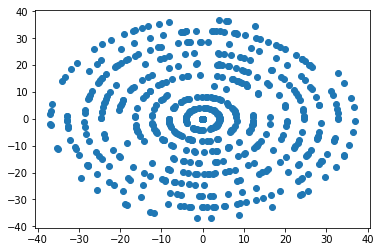

In [20]:
equis= np.array(xs)
ies=np.array(ys)
plt.scatter(equis,ies)#,angulos)

plt.show()

In [21]:
message = [bytes([2]),chr(48),chr(48),chr(48),chr(69),chr(65),chr(82),chr(48),chr(49),binascii.unhexlify(b"9B"),binascii.unhexlify(b"B1"),bytes([3])]
message 
b = bytearray()
b.extend(map(ord, message))
b

bytearray(b'\x02000EAR01\x9b\xb1\x03')

In [22]:
for a in areas_input:
    print(a.hayObjeto(polares))

True
False
